In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

gdp = pd.read_excel('gdp.xlsx')
co2 = pd.read_excel("co2_anual.xlsx")

df = co2.copy()
df = pd.melt(df,id_vars = ["country"], value_name="co2").sort_values('variable').rename(columns = {"variable": "year"}).dropna()
df["year"] = df["year"].astype(int)

df_ale = df[df.country == "Germany"]
df_ale2 = df[df.country == "Germany"]
df_ale2 = df_ale2[df_ale["year"] > 1950].drop(columns="country")
df_ale = df_ale[df_ale["year"] > 1970].drop(columns="country")
df_usa = df[df.country == "United States"]
df_usa = df_usa[df_usa["year"] > 1970].drop(columns="country")
df_china = df[df.country == "China"]
df_china = df_china[df_china["year"] > 1970].drop(columns="country")

df_ale_pre_97 = df_ale[df_ale["year"] < 1998]
df_ale_pos_97 = df_ale[df_ale["year"] > 1997]

industria = pd.read_excel('industria.xlsx')
df_ind = industria.copy()
df_ind = pd.melt(df_ind,id_vars = ["country"], value_name="Industria").sort_values('variable').rename(columns = {"variable": "year"}).dropna()
df_ind["year"] = df_ind["year"].astype(int)

ale_ind = df_ind[df_ind.country == "Germany"]
ale_ind = ale_ind.drop(columns="country")
ale_co2 = df_ale[df_ale["year"] >= 1991]
ale_ind = ale_ind.reset_index().drop(columns = "index")
ale_co2 = ale_co2.reset_index().drop(columns = "index")


## Relação entre a participação no Acordo de livre comércio do sul da Ásia (SAFTA) e

### Hipótese: Houve diminuição da emissão de CO2 pela Alemanha em decorrência da assinatura do Protocolo de Kyoto no ano de 1997

### Mecanismo: O Protocolo de Kyoto é um tratado internacional com compromissos mais rígidos para a redução da emissão de gases que agravam o efeito estufa, sendo o CO2 um deles. Dessa forma, é esperado que a assinatura desses protocolo tenha como consequência a diminuição das emissões desse gás.


#### Inicialmente, é necessário dividir o histórico de emissão de CO2 pela Alemanha em dois períodos distintos: O período pré Protocolo de Kyoto (1970-1997), e o período pós assinatura do Protocolo de Kyoto (1998-2014)

#### O gráfico abaixo representa as emissões de CO2 anuais (x1000 toneladas) no período pré assinatura do Protocolo de Kyoto

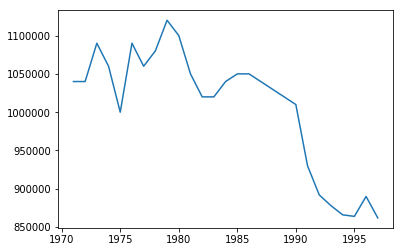

In [5]:
plt.plot(df_ale_pre_97.year, df_ale_pre_97.co2)

#### Os dados  mostram que as emissões de CO2 diminuiram em 17,1% (1040000 mil toneladas para  862000 mil toneladas) no período analisado, demonstrando que a Alemanha já registrava queda em suas emissões antes da assinatura do Protocolo de Kyoto

#### O gráfico seguinte representa as emissões de CO2 anuais (x1000 toneladas) no período pós assinatura do Protocolo de Kyoto

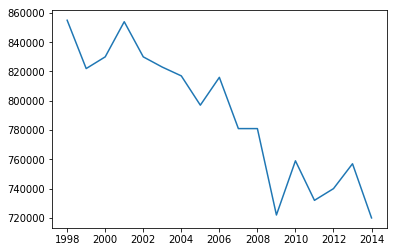

In [6]:
plt.plot(df_ale_pos_97.year, df_ale_pos_97.co2)

#### Os dados demonstram que após a assinatura do Protocolo de Kyoto, as emissões de CO2 continuaram a diminuir, porém representaram uma queda de 15,8% (855000 mil toneladas para 720000 mil toneladas), queda essa menor do que a do período analisado anteriormente

#### Analisando apenas os dados das emissões de CO2 da Alemanha não é possível afirmar que a diminuição dessas emissões após 1997 se deve à assinatura do Protocolo de Kyoto.


#### O gráfico abaixo mostra as emissões de CO2 de 4 dos principais países poluidores que assinaram o Protocolo, antes e depois da data de assinatura.

In [7]:
median_global = df[df["year"] > 1970].groupby("year").mean()


In [8]:
def get_country_co2(countries, df):
    dfs = []
    for country in countries:
        country_df = df[df['country'] == country][df["year"] > 1970].set_index("year").drop(columns="country")
        dfs.append((country_df, country))
    return dfs

In [9]:
dfs = get_country_co2(["Japan","Germany", "Canada", "United Kingdom"], df)

C:\Users\crazy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


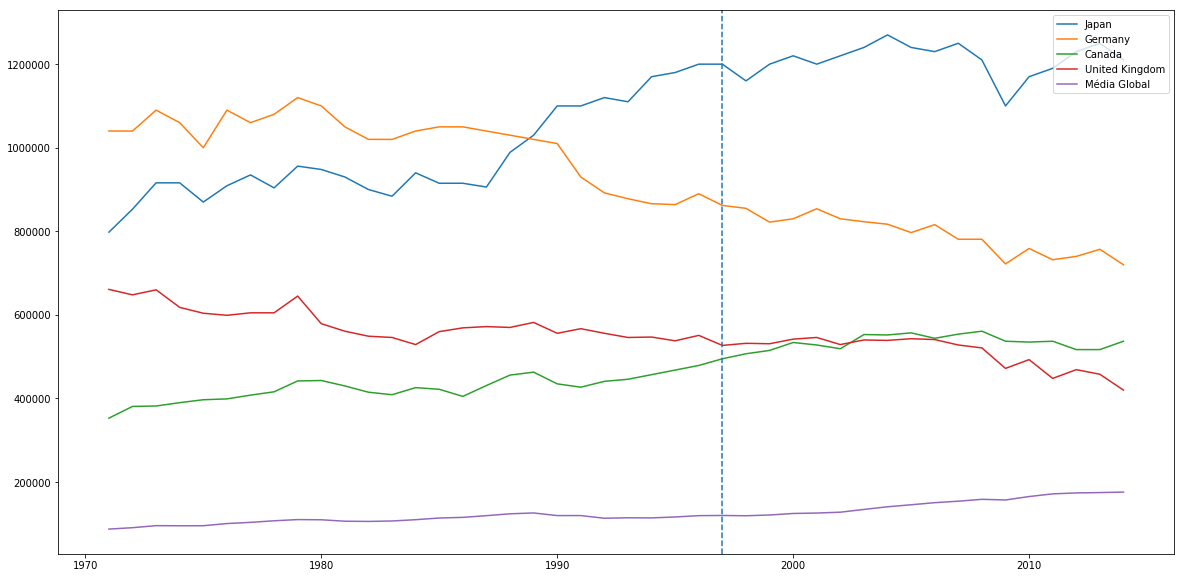

In [10]:
plt.figure(figsize=(20,10))
for df in dfs:
    plt.plot(df[0], label=df[1])
plt.plot(median_global, label="Média Global")
plt.axvline(x=1997, ls='--')
plt.legend(loc="upper right")
plt.show()

#### Novamente, os dados não permitem afirmar que a assinatura do Protocolo de Kyoto causou diminuição na taxa de emissão de CO2, uma vez que Japão e Canada aumentaram suas taxas de emissão após a assinatura, enquanto Alemanha e Reino Unido apresentaram uma leve diminuição

#### O gráfico abaixo corrobora a afirmação anterior, uma vez que tanto China quanto Estados Unidos apresentaram aumento na emissão de CO2 após 1997, sendo que a China assinou o acordo enquanto os Estados Unidos não assinaram

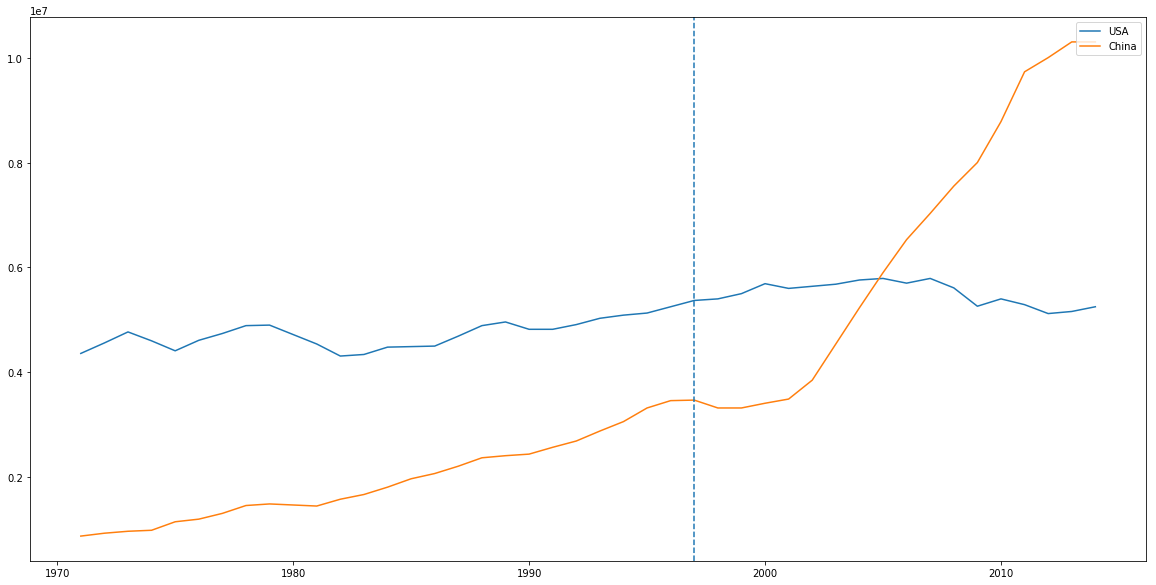

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df_usa.year, df_usa.co2, label = "USA")
plt.plot(df_china.year, df_china.co2, label = "China")
plt.axvline(x=1997, ls='--')
plt.legend(loc="upper right")
plt.show()

#### Uma vez que não foi possível afirmar com os dados analisados que a causa da queda das emissões de CO2 decorreu da assinatura do Protocolo de Kyoto, voltamos ao gráfico inicial para tentar identificar outros possíveis fatores que causaram essa diminuição

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

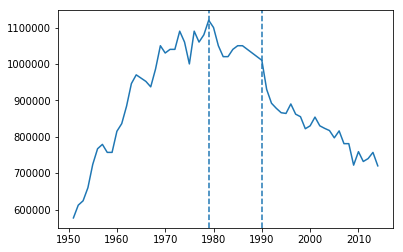

In [12]:
plt.plot(df_ale2.year, df_ale2.co2)
plt.axvline(x=1979, ls='--')
plt.axvline(x=1990, ls='--')
plt.plot

#### É possível identificar no gráfico acima que as emissões de CO2 da Alemanha cresceram até seu valor máximo no ano de 1979, e que a queda de emisões mais acentuada se iniciou a partir do ano de 1990.
#### Analisando o contexto político histórico desse período, identifica-se que no ano de 1990 ocorreu a Reunificação da Alemanha (anexação da República Democrática Alemã pela República Federal da Alemanha). A reestruturação economica  pós unificação resultou na desindustrialização da região (https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.0309-1317.2004.00533.x), como pode ser visto no gráfico seguinte.

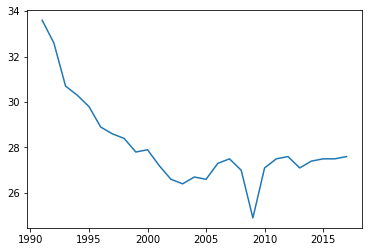

In [13]:
plt.plot(ale_ind.year, ale_ind.Industria)

In [15]:
ale_ind

,year,Industria
0,1991,33.6
1,1992,32.6
2,1993,30.7
3,1994,30.3
4,1995,29.8
5,1996,28.9
6,1997,28.6
7,1998,28.4
8,1999,27.8
9,2000,27.9


#### Para testar a hipótese de que a queda nos niveis industriais resultou na diminuição das emissões de CO2, foi gerado um gráfico de dispersão relacionando as duas variáveis

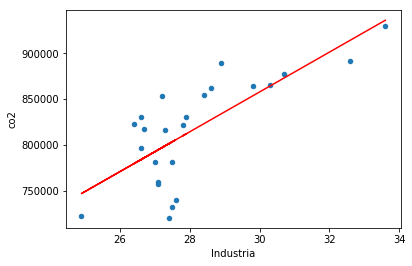

In [16]:
from numpy.polynomial.polynomial import polyfit

ind_co2 = ale_ind.join(ale_co2, lsuffix='_ind', rsuffix='_co2')
ind_co2_2= ind_co2.drop(columns = ["year_ind", "year_co2"])
ind_co2_2
ind_co2_2.plot.scatter(x="Industria", y = "co2")
x = ind_co2_2["Industria"][:24]
y = ind_co2_2["co2"][:24]
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-', color="red")

#### Utilizanda a função "corr" do Pandas, foi possível identificar uma alta correlação entre nível industrial e emissão de CO2 (0.744)

In [17]:
ind_co2_2.Industria.corr(ind_co2_2.co2)

0.7441601454281894